<a href="https://colab.research.google.com/github/PallaviVangari/DataMiningAssignment5/blob/main/Spatio_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# It seems that the kernel has been reset, and we lost the context. Let's re-import the necessary libraries and reload the dataset
import pandas as pd

# Loading the spatio-temporal dataset
file_path_spatio_temporal = '/content/sample_data/Spatio-temporal.dat'
spatio_temporal_data = pd.read_csv(file_path_spatio_temporal, header=None, sep='\t')

# Display the first few rows of the dataset
spatio_temporal_data.head()


,0
0,# x01.txt
1,#
2,# Reference:
3,#
4,"# Helmut Spaeth,"


In [3]:
# Removing header and comment lines
spatio_temporal_data_cleaned = spatio_temporal_data[~spatio_temporal_data[0].str.startswith('#')]

# Resetting the index
spatio_temporal_data_cleaned = spatio_temporal_data_cleaned.reset_index(drop=True)

# Display the first few rows of the cleaned dataset
spatio_temporal_data_cleaned.head()


,0
0,3 columns
1,62 rows
2,Index
3,Brain Weight
4,Body Weight


In [4]:
# Displaying unique values in the dataset to understand its structure
unique_values = spatio_temporal_data_cleaned[0].unique()
unique_values


array(['3 columns', '62 rows', 'Index', 'Brain Weight', 'Body Weight',
       ' 1     3.385    44.500', ' 2     0.480    15.500',
       ' 3     1.350     8.100', ' 4   465.000   423.000',
       ' 5    36.330   119.500', ' 6    27.660   115.000',
       ' 7    14.830    98.200', ' 8     1.040     5.500',
       ' 9     4.190    58.000', '10     0.425     6.400',
       '11     0.101     4.000', '12     0.920     5.700',
       '13     1.000     6.600', '14     0.005     0.140',
       '15     0.060     1.000', '16     3.500    10.800',
       '17     2.000    12.300', '18     1.700     6.300',
       '19  2547.000  4603.000', '20     0.023     0.300',
       '21   187.100   419.000', '22   521.000   655.000',
       '23     0.785     3.500', '24    10.000   115.000',
       '25     3.300    25.600', '26     0.200     5.000',
       '27     1.410    17.500', '28   529.000   680.000',
       '29   207.000   406.000', '30    85.000   325.000',
       '31     0.750    12.300', '32    62.0

In [5]:
# Extracting data values and organizing them into a DataFrame
data_values = spatio_temporal_data_cleaned[0].str.extract('(\d+)\s+([\d\.]+)\s+([\d\.]+)')
data_values.columns = ['Index', 'Brain_Weight', 'Body_Weight']
data_values = data_values.dropna().astype({'Index': int, 'Brain_Weight': float, 'Body_Weight': float})

# Displaying the structured DataFrame
data_values.head()


,Index,Brain_Weight,Body_Weight
5,1,3.385,44.5
6,2,0.480,15.5
7,3,1.350,8.1
8,4,465.000,423.0
9,5,36.330,119.5


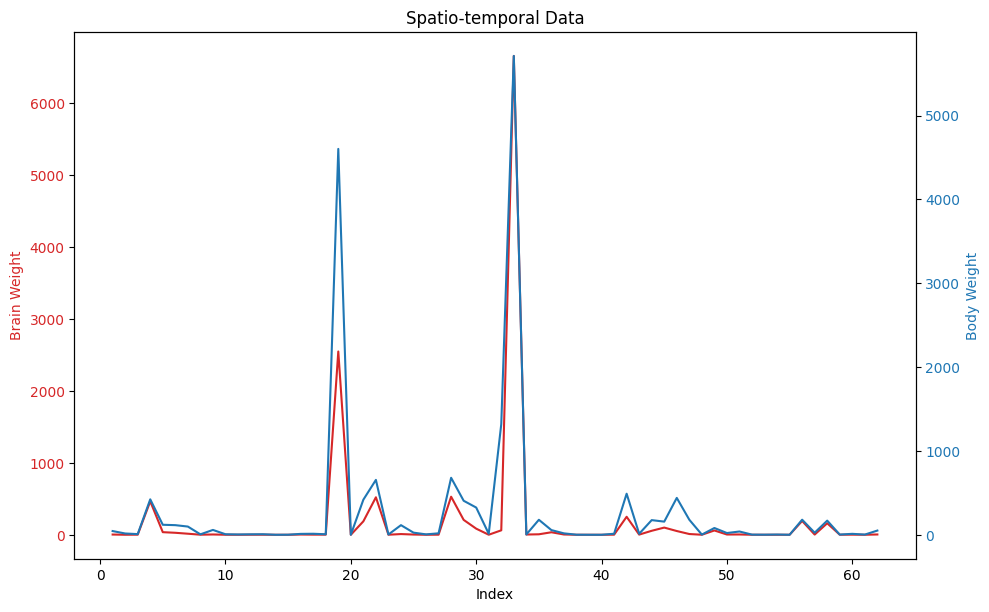

,Index,Brain_Weight,Body_Weight
count,62.000000,62.000000,62.000000
mean,31.500000,198.789984,283.134194
std,18.041619,899.158011,930.278942
min,1.000000,0.005000,0.140000
25%,16.250000,0.600000,4.250000
50%,31.500000,3.342500,17.250000
75%,46.750000,48.202500,166.000000
max,62.000000,6654.000000,5712.000000


In [6]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt

# Descriptive statistics
desc_stats = data_values.describe()

# Visualizing the data
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Brain Weight', color=color)
ax1.plot(data_values['Index'], data_values['Brain_Weight'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Body Weight', color=color)
ax2.plot(data_values['Index'], data_values['Body_Weight'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Spatio-temporal Data')
plt.show()

desc_stats


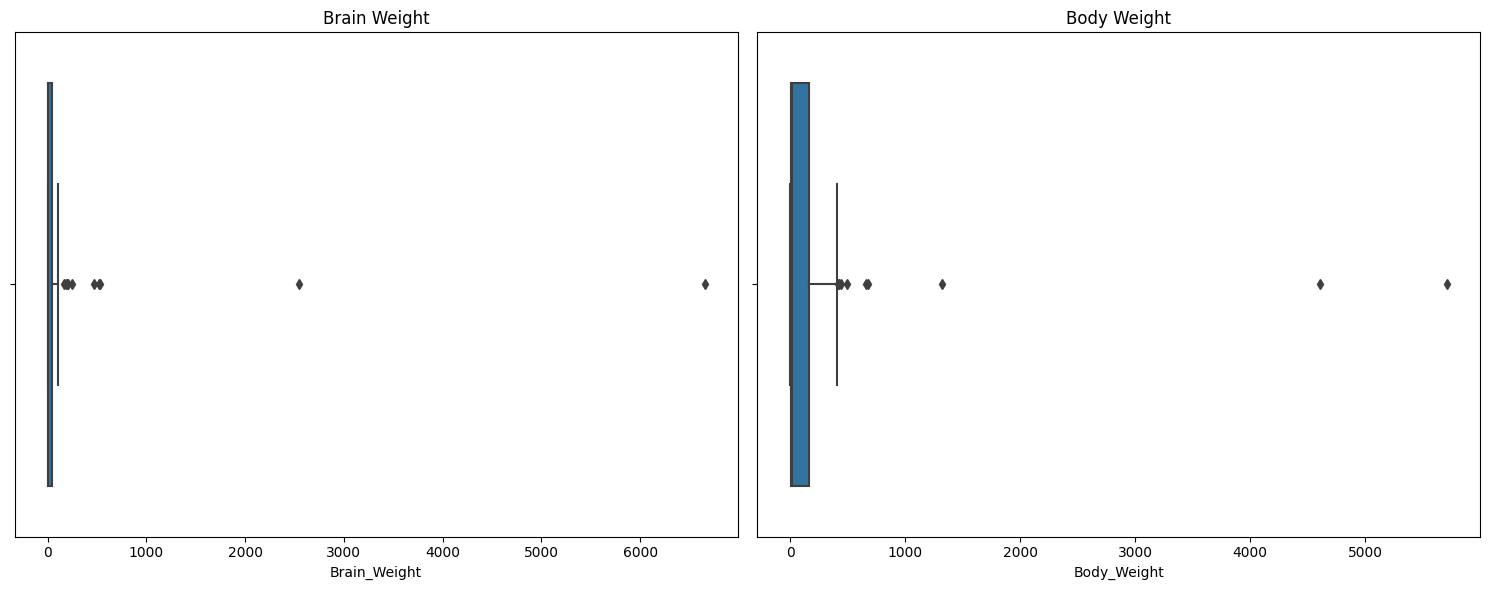

In [8]:
# Importing seaborn library for visualization
import seaborn as sns

# Checking for outliers using boxplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Brain Weight
sns.boxplot(ax=axes[0], x=data_values['Brain_Weight'])
axes[0].set_title('Brain Weight')

# Body Weight
sns.boxplot(ax=axes[1], x=data_values['Body_Weight'])
axes[1].set_title('Body Weight')

plt.tight_layout()
plt.show()


<ipython-input-9-11fbb6000175>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers] = series.median()
<ipython-input-9-11fbb6000175>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers] = series.median()


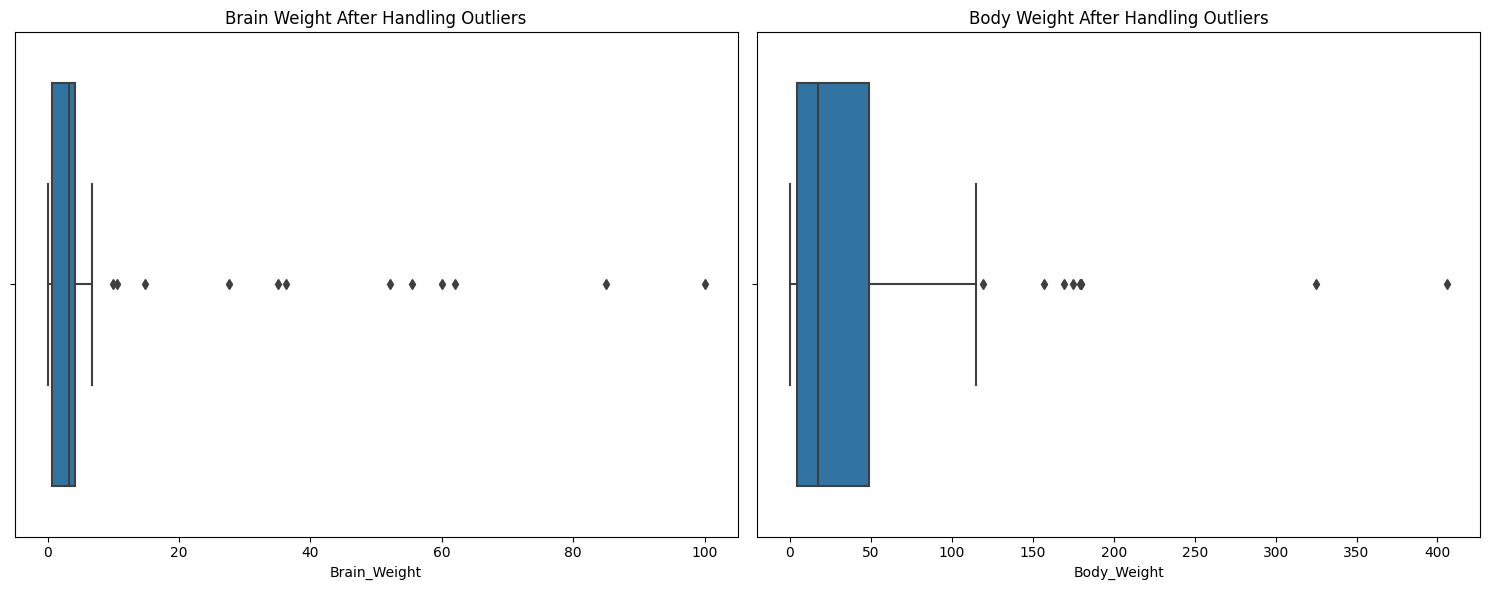

In [9]:
# Handling outliers in 'Brain_Weight' and 'Body_Weight'

# Define a function to replace outliers with the median
def replace_outliers(series, multiplier=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    outliers = ((series < lower_bound) | (series > upper_bound))
    series[outliers] = series.median()
    return series

# Replacing outliers in 'Brain_Weight' with the median
data_values['Brain_Weight'] = replace_outliers(data_values['Brain_Weight'])

# Replacing outliers in 'Body_Weight' with the median
data_values['Body_Weight'] = replace_outliers(data_values['Body_Weight'])

# Checking for outliers after handling
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Brain Weight
sns.boxplot(ax=axes[0], x=data_values['Brain_Weight'])
axes[0].set_title('Brain Weight After Handling Outliers')

# Body Weight
sns.boxplot(ax=axes[1], x=data_values['Body_Weight'])
axes[1].set_title('Body Weight After Handling Outliers')

plt.tight_layout()
plt.show()


In [11]:
# Feature Engineering: Creating new features

# Creating a new feature: Ratio of Brain Weight to Body Weight
data_values['Brain_to_Body_Ratio'] = data_values['Brain_Weight'] / data_values['Body_Weight']

# Display the first few rows of the dataset with the new feature
data_values.head()

from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying the scaler to the data
data_normalized = scaler.fit_transform(data_values[['Brain_Weight', 'Body_Weight', 'Brain_to_Body_Ratio']])
data_normalized_df = pd.DataFrame(data_normalized, columns=['Brain_Weight', 'Body_Weight', 'Brain_to_Body_Ratio'])

# Display the first few rows of the normalized data
data_normalized_df.head()


,Brain_Weight,Body_Weight,Brain_to_Body_Ratio
0,0.033802,0.109299,0.018917
1,0.004750,0.037846,0.006340
2,0.013451,0.019613,0.044182
3,0.033377,0.042157,0.051739
4,0.363268,0.294092,0.082484


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

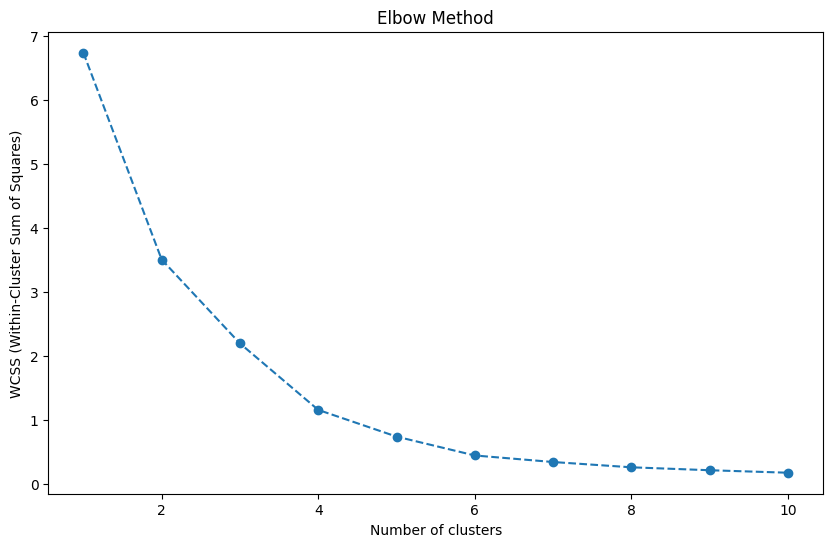

In [13]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_normalized_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 11), wcss, marker='o', linestyle='--')
ax.set_title('Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


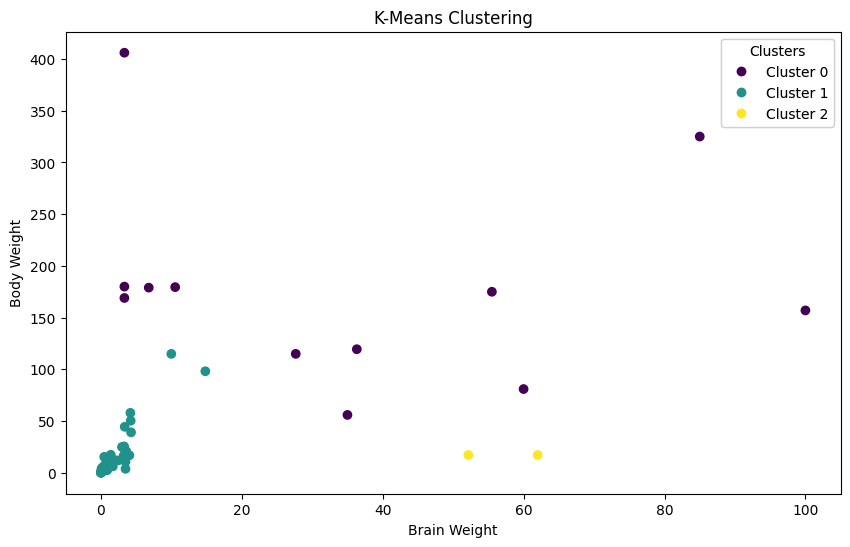

In [14]:

# Applying K-Means clustering algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_normalized_df)

# Adding the clusters to the original dataset
data_values['Cluster'] = clusters

# Visualizing the clusters
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data_values['Brain_Weight'], data_values['Body_Weight'], c=data_values['Cluster'], cmap='viridis')
legend_labels = ['Cluster {}'.format(i) for i in range(3)]
legend1 = ax.legend(handles=scatter.legend_elements()[0], title="Clusters", labels=legend_labels)
ax.add_artist(legend1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Brain Weight')
ax.set_ylabel('Body Weight')
plt.show()